<font size=7><b> Organoid Training Part 1

<font color="green">48.5 total Points

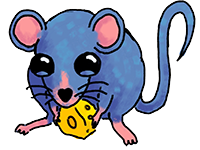

In [1]:
from IPython.display import Image
Image(filename='.images/mouse_mascot_transp_downsized.png') 

![alt text](.images/mouse_mascot_transp_downsized.png)

![Scott the mouse Mouse-Scott](.images/mouse_mascot_transp_downsized.png)

For this homework you will be working in a group to formulate an experiment on a live brain organoid. This homework will explain the way you will be interfacing with your organoid along with a simulated environment to test your code before pitching your experiment. You will also be given the tools needed to analyze the data produced by your experiment. Then, in the exercises, your group will construct the experiment, with a hypothesis and expectations. After the experiment is over, your final project will be to analyze the results of your experiment. The data that you'll receive back to analyze will be in the same format as the dataset used in this notebook. Thus, if you want to get a head start on analysis, you can use the provided data as a starting point.

I recommend looking at the source code, particularly the "toy" OrganoidInterface class we've provided there as it works similarly to how the organoids will react.

This homework has a lot of moving parts, and there is a lot to read. Make sure to start early and give yourself enough time to digest the material. 

<b><font color="red">Treat this as part of the FINAL for the class because it is.

<font color="red"><b>Note:</b> This HW is **due Friday (May 24), at 11:59pm**. This is a group assignment so make sure to work together closely with a team of 4-5 people. Make sure to complete this on time because we can't have extensions for this homework, meaning <b>START EARLY</b>. Think very carefully about what you propose as your experiment. Be conservative on what you try to attempt. Once you submit, there's no going back!

In [5]:
%run "organoid_training_source_code.ipynb"

Loading: organoid_training_source_code.ipynb...
Done at: 2024/05/17 18:25:43


Since this is a group assignment your first exercise is to choose a name for your group! Write the name you've chosen in the markdown cell bellow :

 <font color="green"> (1 point)

<font color="green"><b>Answer

# Reading Material

You will be required to devise your own experiment for this HW assignment. We highly recommend that you read through some of the suggested papers below for inspiration and guidance. Many of these papers are from Potter's lab. He was an early pioneer in MEA stimulation.

General Reading : 
* [Maxwell Device Specs](reading_material/Maxwell_MaxOne_Specs.pdf)
* [Stim Artifact Supression](reading_material/Artifact_Supression.pdf)
* [Stimulation Reference](reading_material/Stimulation_Reference.pdf)
* [Searching for Neural Plasticity](reading_material/Searching_for_Plasticity.pdf)
* [Closed Loop Control of Neural Bursting](reading_material/Tal_Neural_Circuitry.pdf) 

Reading Relevant to Organoid Interfacing :
* [Goal Directed Learing](https://iopscience.iop.org/article/10.1088/1741-2560/5/3/004/pdf) Potter et al.
* [Moving a Robot with Neurons](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2266971/) Novellino et al.
* [Learning in Cortical Neurons](https://www.jneurosci.org/content/21/22/8782.full) Shahaf & Marom
* [Computation on Brain Organoids](https://www.nature.com/articles/s41928-023-01069-w) Cai et al.
* [Neurons Play Pong](reading_material/neuronal_pong.pdf) Kagan et al.

<b>Note :</b> I highly recommend you take the time to read through at least the Potter and Novellino papers to get a good grasp of materials and experiments similar to ours.

# Analysis Methods: 

Before you begin working on an experiment, you should familiarize yourself with the ways we can collect information from our experiments and understand them. In this part of the notebook, we will go into detail about the methods you will be using throughout the procedure and in your final writeup. 

While you read through this section, as a group, try to think about interesting ways you can use these tools to get some unique insight on the data we'll collect from your organoids. Are there ways to combine these tools to produce something new? A good tip is to look at the source code of the notebook and see how we find this information so you can modify it to your needs later.

Data visualization is also important, in this section we show that you can plot the STTC matrix on a graph of the organoid. What are some other metrics we could try plotting?  Also, think about what an anomaly in the data you receive might look like and what it could mean.


## Multi Electrode Arrays

To gather data and interface with the organoids we are using the device you explored in the Electrophysiology homework, the CMOS multi electrode array provided by Maxwell Biosystems. Specifically, Prof. Tal Sharf used the, [Maxwell Biosystems, Maxone MEA](https://www.mxwbio.com/technology/?gclid=Cj0KCQjwr82iBhCuARIsAO0EAZw9HkpNG65Ot-iM4ZKitSkEYj4utIb3EXS6lGWZbp6G9ABrDn2UChEaAsy8EALw_wcB) to perform his Diazepam experiment. [Maxwell has a brochure](http://54.183.203.115:8888/files/work/Experiment/reading_material/Maxwell_Organoids.pdf) summarizing organoid experiments on the MaxOne.

For our experiment, there is a small rectangular surface on the MaxOne where we place our organoid. The surface of the MaxOne chip contains over 20,0000 electrodes. From this, we can select about 1,000 electrodes to record from for the experiment. The electrophysiologist running the experiment carefully selects which electrodes they want to record from. Specifically, they want to choose electrodes that are touching the neural tissue, so that they can record as much neural activity as possible. Below is the electrode layout used in a with a specific organoid on it, a connectoid, which are a series of organoids that have had a neuron bridge grow between them, allowing each to send and receive information from the other. While these are very interesting they are not relevant to our current experiment, however this layout provides a good image of how the neural tissue looks when plotted out. Notice that there are two big clumps of electrodes. The clumps are where the bodies of the two organoids are located.

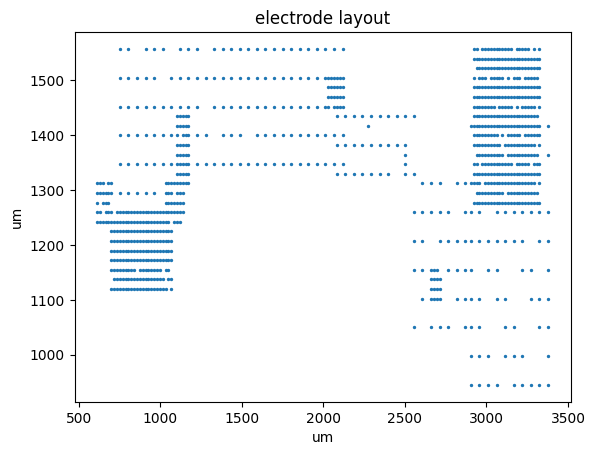

In [6]:
electrodeLayout()

For now this mapping simply shows the electrodes that have been chosen for this specific experiment, without the neural units plotted over them. We are able to record activity from the neural tissue directly over the highlighted portions of the array (shown in blue).

## Spike Sorting and  Neural Units

In a previous homework you were provided a Spike Raster, a matrix which tells you at what moment each neuron fires. How do we go from talking about raw signals recorded from 1,000 electrodes, to the spiking times of some 100 neurons? The complicated question is an active area of research in neuroscience called [spike sorting](http://www.scholarpedia.org/article/Spike_sorting). There is a [great video](https://en.wikipedia.org/wiki/Spike_sorting) on wikipedia about spikesorting. Spikesorting doesn't yet produce perfect results, so scientists still have to manually curate results. Curating spikesorted results was one of the exercises you did in the last homework. We don't actually know if the results from spikesorting are truly individual neurons (They are mostly but not always, the tech is far from perfect). For this reason, the outputted "neurons" from spikesorting are usually called **putative neurons** or **neural units**.

<p>&nbsp</p>

<center><b>Spike Sorting Diagram</b>

![alt text](https://ars.els-cdn.com/content/image/1-s2.0-S0361923015000684-gr1.jpg)

Below we see the same electrode layout as before, but this time there are red dots on it. These red dots are the places where a spikesorting algorithm believes neurons are located.

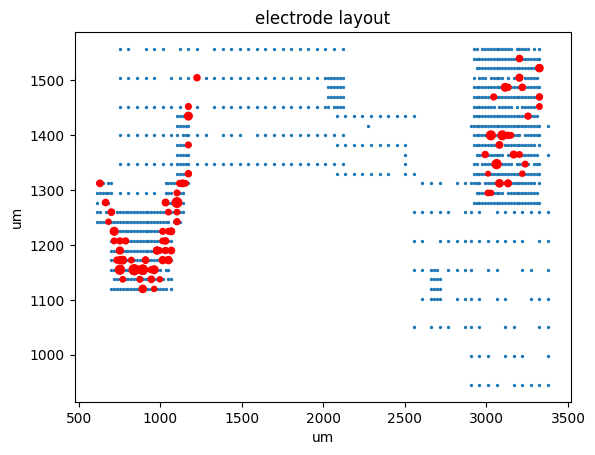

In [7]:
neuronLayout(connectoid)

After you have run your experiment, you will be provided the spikesorted data for you to plot it out, <font color="red"><b>you do not have to do the sorting yourself</b></font>. As the expirement will be done in three phases, which we will go into later, you will be able to see three layouts generated via the spikesorting done on each phase of the recording. These may look different since as a result of stimulus during the experiment, the neurons in the organoid will have their firing patterns changed which could result in different neural units being classified by the sorting process.

## STTC and Causal Connectivity

In the Electrophysiology HW we learned how the Spike Time Tiling Coefficient (STTC) is a measure that is similar to correlation, except with values from [0,1] instead of [-1,1]. It tells us the degree to which two neurons fire together. It represents connectivity between neuron pairs across the organoid. We can use the information from the matrix to understand the degree to which information is communicated across an organoid. 

Below is a simple interactive graphic that considers this question. In the left graph, a line is drawn between all pairs of neural units whose STTC is above some threshold. The right graph is almost the standard STTC matrix, but it displays only STTC values that are above the threshold. Notice that as you increase the threshold that the STTC must be above, the number of lines disappear from the graph. Notice also that the lines between the two organoids disappear first (threshold
$\approx$
0.5), and then, later, disappear between neurons within the same organoid (threshold 
$\approx$
 0.8). This makes logical sense. We expect there to be stronger communication between neurons that are close to each other, inside the same organoid. Neurons that are in two different organoids most likely have weaker communication between each other.

$$
\textbf{IF:}\:\text{STTC}_{i,j}>\text{threshold},\quad\textbf{THEN:}\:\text{DrawLine}_{i,j} \quad \forall i,j\in\{\text{selected neurons}\}
$$

In [9]:
interact_manual( sttcLayout, sd=[connectoid], threshold=(0,1,.1) )

interactive(children=(Dropdown(description='sd', options=(<braingeneers.analysis.analysis.SpikeData object at …

<function __main__.sttcLayout(sd, threshold)>

### Causal Connectivity

However, you may notice the STTC matrix is symmetrical, this means that it does not show directionality.  It is still a useful metric, however we can get more info on how information flows with something called a Causal Connectivity Matrix. Causal Connectivity allows us to see the one way correlation between two neural units, i.e. the rate of neural unit A firing after neural unit B is different from the rate of B firing after A. 


![CCmatrix](.images/Causal_Connectivity_downsized.png)

What is really useful about Causal Connectivity is we can see how the neural units chain together. When looking directly at the matrix the first thing that will be obvious is what neural units fire directly after anothers; these show a one-way connection but it goes further than that. But we can tell the order of the connections. If something is a first order connection there is a direct link between the two units, if A and B are in an nth order connection that means there are n-1 other neural units relaying the info from A before it reaches B, there are n-1 units "between'' A and B. Using the CC matrix on different time intervals we can distinguish the order of connections. The matrix we saw previously is taken over a pretty large time frame (200ms), we can see a lot of connectivity across the board.

To demonstrate how we can distinguish the order of connections, let's look at neural units 5 and 8. We see 8 is reactive with 5 and neural unit 1 is very reactive with 8. Thus we see also 1 is reactive with 5:


![CCmatrix200ms](.images/Causal_Connections_map4_downsized.png)

But now let's look at a shorter time frame, 10ms, plotted in the graph below. Here we see unit 5's connection with 1 disappears while the connection to 8 stays strong, thus it's likely the information flow is neural unit 5 $\rightarrow$ 8 $\rightarrow$ 1. We'd say 5 to 1 is a nth order (likely second order) connection while 5 to 8 is a first order connection. This information can somewhat be intuited by just looking at the 200ms window, but it is useful to check at shorter time intervals.

![CCmatrix10ms](.images/Causal_Connections_map5_downsized.png)


Before we move on, think about how else the CC matrix could help us, if we see a row of all dark colors we can assume the associated neural unit is an excitatory one, if it's all muted then it's perhaps an inhibitory unit.

### Connection Diagrams

We can use the Causal Connectivity Matrices like we did above to create a map of how 1-way connections are made through the organoid. for example from the info we just gathered above with units 5,1, and 8, we can draw the following diagram :

![SimpleConnections](.images/simple_connection_chart_downsized.jpg)

Adding some other connections we can see from the matrices we get the following rudimentary Connection Diagram :

![MoreConnections](.images/complex_connection_chart_downsized.jpg)


Later on in this notebook you will be asked to draw one of these for your own organoid, explaining how different neurons with different purposes should connect to one another.

## Latencies

Using the STTC we learned a way to measure the degree to which neurons fire together. But is there actually any degree of communication between the neurons? One way to parse out this question is to see if one neuron consistently fires before the other. This is done by using a measurement called **spike time latency**, or latencies for short. 

Suppose we want to calculate the latency between some spike on a neuron ($n_1$) compared to another neuron ($n_2$). The latency is calculated by measuring the duration of time in between the spike of $n_1$ and the closest occuring spike from $n_2$. If the $n_1$ spike occurs before the $n_2$ spike this distance is positive, otherwise, the distance is negative. Doing this for all the spikes of $n_1$ we can create a histogram of the latencies between two neurons. if the histogram has mostly positive values, or mostly negative values, then we have a general notion of the direction of "information flow".

The interactive graphic below plots a histogram of the latencies between any two neural units. Try running the widget with $n_1=69$ and $n_2=38$. Notice that these two neurons that are located close to each other have latencies that are skewed negatively. Now make $n_1=38$ and $n_2=69$. Notice that the latencies are now skewed positively.

In [ ]:
#interact_manual( latencyPlots,  neuron1=(0,sd.N-1), neuron2=(0,sd.N-1) )

## <Font color="green"> Reflection (1 Point)

Now that you are familiar with some basic tools of the experiment, discuss with your group what methods you could use later in the analysis section of your final project. Try to think of some methods that expand on the ones above, as an example, maybe plotting firing rate over the 2d neuron layout like we do for STTC. You will not be held to implementing these, however it is a good exercise to start thinking of these things now. Write these ideas bellow:

<font color="green"><b>Answer

# Experiment and Interface With the Organoid

Starting now, you will be formulating and working on an experiment that will be performed on an actual <b>mouse cortical organoids</b>. These organoids have been grown throughout the quarter and are currently firing healthily! But this means we need to start the experiments as soon as possible so that they don't get contaminated and die.

We will be exploring the behavior of our culture in a simple game-like environment called "Foodland." This game will be run on a computer and will use the organoid to make decisions in the game's "world," guiding a mouse through a simple environment to gather cheese. To do this, we need a method for the organoid to communicate back and forth with our digital computers, along with a method for the organoid to change its behavior according to the state in Foodland. This is where you and your group come in, the organoid will be able to interface with the computer using functions you write! 

You will need to work on three methods to do the following: 

1. Encoding: sending information TO the organoid (stimulation)
2. Decoding: receiving information FROM the organoid (activity readout)
3. Training: modifying processing in the culture (stimulation / other)

Now, we have to be a bit careful here since any stimulation can modify the actual culture processing, but this is inherent in the problem, you will be using this same property to your benefit with the training signals.

Your experiment will take place across three phases, pre stim, running the experiment, and post stim. Pre stim will be five minutes of baseline activity with then 5 minutes where we record spiking to create your initial Causal Connectivity Matrix. We then run the experiment for 15 minutes where your functions and simulations will be put to the test to see what kind of learning we can get. Then we have 5 minutes of post stim at rest before a final 5 minutes where we record data to create your post-experiment Causal Connectivity Matrix. 

Before we get into what each function does we need to make a slight detour and discuss the subject of stimulation.

## Neural Stimulation

For your experiment, you will be sending electrical signals to training neurons that are in the organoid. When the neurons receive these electrical signals it causes them to fire. That is why this process is called **Neural Stimulation**. Making neurons fire over and over again at specific times can permanently change the firing pattern of the neuron. This process is called **Neural Plasticity** or **Synaptic Plasticity**.

### What is a Stimulation Pulse?

A stimulation pulse occurs when we use one of the electrodes on the MEA to change the voltage for a short period of time. This change in voltage only affects neurons in the immediate vicinity of the voltage change. Below is a plot of the most common type of stimulation pulse we use for experiments. This type of pulse is called a **square wave**. We raise the voltage 150mv and then lower it by 150mv, bringing the voltage back to the resting state. In total, this pulse takes 200 μs seconds from start to finish. Note that μs means microseconds, where there are 1000 microseconds in a millisecond. Notice that this pulse resembles the change in mV seen when a  [neuron spikes](https://en.wikipedia.org/wiki/Action_potential).

<p>&nbsp</p>
<center><b> A square Wave plotted over the course of a second:

<center>

![SquareWave](.images/Stim_Pulse_downsized.png)

<b>Note:</b> if you would like to see the code used to generate this square wave, the function definition for it can be found in the source code under the section : "Stim Pulses -> Legacy"

For the purpose of this experiment, you'll mainly want to concern yourself with the frequency of your stim pulses, measured in Hertz (Hz) = cycles per second.

### Creating a Stim Pulse

To encode and train your organoid you will need to know how to create stim pulses in python. So while we're on the subject, let's discuss that. You will create something called a stim protocol, which in code is essentially a fancy list that our software can parse to send specific pulses through the MEA to the on-chip culture.

The stim pulses you write can be simple, just consisting of one repeating pulse : 

In [31]:
stim_pattern1 = []
stim_pattern1.append(('stim',[0],150,100))

print(stim_pattern1)

[('stim', [0], 150, 100)]


We can use the function `create_stim_pulse_sequence()` to see our signal plotted out :

In [ ]:
signal,t = create_stim_pulse_sequence(stim_pattern1, freq_Hz=2)
plotStimPattern(signal,t)

Or they can be more complex with many patterns within them, stimulating multiple neural units : 

In [32]:
stim_pattern2 = []
stim_pattern2.append(('stim',[0],100,200))
stim_pattern2.append(('delay',200))
stim_pattern2.append(('stim',[1],150,300))

print(stim_pattern2)

[('stim', [0], 100, 200), ('delay', 200), ('stim', [1], 150, 300)]


In [ ]:
signal,t = create_stim_pulse_sequence(stim_pattern2, freq_Hz=2)
plotStimPattern(signal,t)

In this protocol. $n_0$ is stimulated at 100mV for 200μs. We wait 200ms. Then $n_1$ is stimulated at 150mV for 300μs. This protocol is repeated at a frequency of 2Hz, which means that the stim pattern occurs twice a second. Below is a slightly more complicated stimulation protocol.

Here are a few more examples of creating stim patterns so you become accustomed to the process : 

In [44]:
# ------------------------------- Example 1 -------------------------------

training_neurons = [0,1,2,3]
amp_mv = 400 # milivolts for stimulation
phase_width = 200 # microseconds for stimulation

example1 = [('stim',training_neurons, amp_mv, phase_width)] # instead if you were working with a class you could use self.training_neurons
print(example1)


# ------------------------------- Example 2 -------------------------------

example2 = []
example2.append(('stim',[0,1,2],150,200)) # stim neurons 0,1,2 with 150 mV and 200 us
example2.append(('delay',5)) # delay 5 ms
example2.append(('stim',[1],150,200)) # stim neuron 1 with 150 mV and 200 us
example2.append(('delay',15)) # delay 15 ms
example2.append(('stim',[0,2],150,200)) # stim neurons 0,2 with 150 mV and 200 us
print(example2)

[('stim', [0, 1, 2, 3], 400, 200)]
[('stim', [0, 1, 2], 150, 200), ('delay', 5), ('stim', [1], 150, 200), ('delay', 15), ('stim', [0, 2], 150, 200)]


Now we can plot these signals so you can see how they look!

In [ ]:
signal1,t1 = create_stim_pulse_sequence(example1, freq_Hz=20)
signal2,t2 = create_stim_pulse_sequence(example2, freq_Hz=10)
plotStimPattern(signal1,t1)
plotStimPattern(signal2,t2)

Since example 2 is so complex it may be work to plot the pulses on each neuron separately. Use the following function when drafting stim pulses for your experiment if you want!

In [ ]:
plotIndividualPatterns(signal2,t2)

A simpler method to send signals to an organoid is by calling `self.sensory_stim_Hz` and modifying its array. This does not let you have as much control as with the other methods but if you are just wanting to encode something via frequency this may be the better method to use.

<pre> self.sensory_stim_Hz["neuron in array to stim here"] = "frequency in hertz to stim at" 

Here is an example of how to use this function: `self.sensory_stim_Hz[0] = 20`

Some final important info, do not stimulate your organoid with long high voltage pulses. This will cause the neuron firing in the organoid to tire out in a process known as the <b>Tetanus Effect</b>, this will not only make the organoid "sluggish" when trying to play Foodland, but might also damage it. <font color="red"> Do not use voltages over 150 mV and frequencies above 30 Hz, nor overly long stim phases. 

## Encoding

To tell the organoid where it is in the Foodland environment, we need a way for the organoid to receive data from the computer running the game. How can we send digital data to an organoid and have that affect the electrophysiological signals? Through encoding it with stimulation pulses. The [Novellino et al. paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2266971/) provides a good summary of how they encoded data in their methods section. Please make sure your group has read this before continuing, focusing on how they translate data into motor commands.

There are multiple ways we could go about encoding data for the organoid, here are two examples to get you thinking about what you could use in your experiment:

### Rate Encoding
Rate encoding is the process of sending information using a stimulated firing rate. Sending a stim pulse at a specific frequency could be read by a neuron in the organoid and that frequency would hold the information we'd want to send it. For example, using the cart-pole exercise we did last homework, we could take an angle between [-14, 14] degrees and convert it to stimulations at a rate between [0,10] Hz to a single neuron

You could imagine how it perhaps would be better to encode [-14, 0] for neuron A between [0,10] Hz, and [0,14] -> [0,10] Hz to neuron B. There is a whole scope of possible encoding functions you could use for this specific example.

### Spatial Encoding
Perhaps instead of firing rate of the neuron, we use 3 separate neurons to encode information. Back to the cart-pole exercise, Neuron A could signal that the pole is leaning to one side, Neuron B could signal it being centered, and Neuron C could signal leaning to the other side. From the lectures with Professor Turner-Evans we saw how the fruit flies encode their head angle using a spiral of neurons, each neuron encoding a position, this would be a form of spatial encoding!

### Other Encoding
If you want, browse around for articles to see how other information can be represented neurally. Keywords to use are: 
Neural representation, sensory, encoding, etc. 

### Example Encoding Function

Here is the peusdocode for an example encoding function :

<pre>
if food_signal is under 0.5  :
    stim organoid at ( food_signal * 5 ) Hz
else :
    stim organoid at 10 Hz

### <font color="green">Reflection (3 Points)

What were the two methods of encoding described in the Novellino et al. paper?

<font color="green"><b>Answer

What types of encoding do you think you could use for the experiment? What kind of data would they send to the organoid? Draft 1 or 2 encoding functions for these in pseudocode. If you use any encoding functions from articles you've found online, please make sure to cite them!

<font color="green"><b>Answer

Pseudocode :

## Decoding

We need a way of receiving info from the organoid. However, our culture won't send stimulation pulses back in response, instead we need to work based on the spiking behavior in the organoid. 

You will have access to two methods to read data, spike counts and spike rates. You can access these from an organoid object with `self.motor_spike_count` and `self.motor_spike_rate` respectively, ie <b>organoid.motor_spike_rate</b> would return that organoid's current spike rate. 

It is up to you to devise methods to use this info to decode motor neuron movements however once again I would point you to [Novellino et al.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2266971/) for ideas on how to do this. Like with encode you have a lot of freedom on how to implement this. Think about ways to translate spike counts and spike rates into movement. Maybe you'll have neural unit A's spike count decode to the distance for the mouse to move forward and unit B's for strafing distances for an example and a high spike count in a neuron translates to moving the a long distance in associated direction, perhaps there is a threshold of spike counts under which you move right and over which you move left. You could sum the number of spikes on one neuron or the other, or take a moving average, there are many ways to go about this.


### <font color="green"> Bonus Question (5 points extra credit)

Can you write a function that calculates the angle from the mouse to the nearest cheese? Ie can you write a function that uses decodes, encodes, or both along with python code to calculate $\theta$ : 


![MouseArtByAri](.images/mouse_angle_downsized.jpg)

Write your code to do this in the cell below :

<font color="green"><b>Answer

## Training

How will our organoid learn to better navigate its environment? Last homework we had you work on reinforcement learning. This time we'll be doing something similar to the organoid however because of the beauty of how neurons work, while Foodland will have typical rewards in the form of cheese, we can also use the feedback we send the organoid to actually change its circuitry in real time, not just incrementally tell it if it's doing good or bad.

Writing the training function will probably be where you will be able to test new methods of having the organoid perform actions. This part of neuroscience is being actively researched so feel free to be as creative with your training function as you wish! Once you have an encode and decode function, think about this: what is a function you could write that would change the weights in the organoid in order to solve the problem of navigating Foodland? I suggest looking through the reading materials for inspiration but make sure to not stick too closely to what is written there, we want you to try new things here and be creative!

When it comes to formulating your experiment we want you to come up with a hypothesis for how the organoid may react to your specific training signal, so think carefully and make deliberate choices when writing your training function. 

## Organoid Architecture

To make sure the organoid can navigate and interact with the Foodland game in the way we want it to, we'll need to devise some sort of architecture for our organoid. You do not have to design the abstract side of things and decide what processes to run on the culture, this has already been done for you. The organoids you will be working with will have three designated classes of neurons : 
1. Motor  : action from the organoid
2. Sensory neurons : observation into the organoid
3. Training neurons : modulate behavior

Motor neurons will be what controls the mouse's position and movement in the environment. You'll receive signals that will need to be decoded from these, which will describe actions from the organoid for the mouse to take in Foodland.

Sensory neurons will be the ones that embed external data into the circuitry of the culture. You'll send encoded signals to these to tell the organoid information about the mouse's environment. Provides observations for the organoid to react to.

Training neurons will be the neurons that you send your training signals to. Hopefully when they receive this information their firing will cause a shift in the circuitry of the culture and change its overall behavior.

You should expect to have around 10-20 neurons to allot to these three groups. However keep in mind you can only have up to 3 motor neurons in your experiment. Another important thing to note is that sensory and training neurons can overlap, meaning you can have a neuron be both a sensory and training neuron, but motor neurons cannot overlap at all. They must be only motors.

Once we get the organoid firing in real time, you will be given the causal connectivity matrices, and if you are present for the actual experiment, will be allowed to choose your Motor/Sensory/Training neurons yourself based on that information. If you aren't present for the experiment an Electrophysiologist will try to approximate the correct neurons to map based on this info and your desired connectivity based on the connection diagram you will submit. Even if you are present for the live run, we want your choices of neurons to generally follow the flow shown in that diagram. 

## Foodland Architecture

This experiment runs both on a computer and an organoid so, to succeed you will also need to understand the parameters and rules of the game we are playing. Our little mouse can receive 9 pieces of data from the environment, however we will not be using the spikes/bombs in this experiment so you will only need to worry about 7 of them at most. These pieces of data are passed as an array `observation`, they are as follows :

1. observation[0] : `self.food_signal` the distance the mouse is from food, 1 being close, and .001 when far, this value decays exponentially the further from food the mouse gets
2. observation[1] : `self.spike_signal` similar to food_signal but for spikes/bombs, you will not need to worry about this one
3. observation[2] : `self.agent_pos[0]` encodes the x position of the mouse in the environment
4. observation[3] : `self.agent_pos[1]` encodes the y position of the mouse in the environment
5. observation[4] : `self.agent_dir` angle the mouse is facing in radians, it's direction in the environment
6. observation[5] : `self.food_got` The amount of cheese collected this step/trial
7. observation[6] : `self.spike_hit` the amount of spikes hit this step/trial, you will not need to worry about this one
8. observation[7] : `self.is_contacting_wall` a Boolean denoting whether the mouse is touching the boundary of the game world, false for not, true for touching a wall. If it is, it could be stuck trying to move through the wall, use this to reorient the mouse in that case. 
9. observation[8] : `self.food_signal_grad` the change in distance between the mouse and the nearest piece of cheese, positive when moving towards a piece, negative when moving away. 

With all this information you can now begin working on your final project!

Run the cell below to create a toy version of the organoid interface so that you can use it with test throughout this notebook

In [13]:
env = FoodLandEnv(render_mode=None, max_steps=150)

organoid = OrganoidInterface(env)

organoid.connectivity.shape

(12, 12)

# <font color="green"> Exercises (44.5 Points)

## <font color="green"> Reading Review (6 Points)


Compare the training methods and results for the [Kagan et al.](reading_material/neuronal_pong.pdf) and the [Potter et al.](https://iopscience.iop.org/article/10.1088/1741-2560/5/3/004/pdf) papers. As it turns out, the pong paper caused some controversy in the field, why do you think that is?

<font color="green"><b>Answer

In the [Potter et al.](https://iopscience.iop.org/article/10.1088/1741-2560/5/3/004/pdf) paper, what is the paradigm for the training/learning signals in the 2d culture? What did they send when the culture was performing well and what did they send when it was performing badly? Why did they choose these signals?

<font color="green"><b>Answer

## <font color="green"> Practice on Connectoid Data (10.5 Points)

The exercise sections are to be done using the "connectoid" Dataset that is used as an example in the earlier reading sections of the notebook. To access properties of this dataset use "connectoid.\<function here\>" for example :

In [ ]:
connectoid.N

### Data Summary <font color="green"> (2.5 Point)

How many electrodes are there on the MEA? <font color="orange"><b>Hint:</b> Check the reading for exact number.</font> How many electrodes are we recording from? How many electrodes *could we record from*? How many neural units were found through spike sorting? How many rows are there in this connectoid's spike raster?

<font color="green"><b>Answer

<font color="green">Provide an text answers below:

<font color="green"><b>Answer

<font color="green">Provide any code for calculations below:

### Organoid Plotting <font color="green"> (2 points)  

Copy the code that graphs the neural units of the connectoid on the MEA. Change the graph so that all the neural units in the left connectoid are green, and all the neural units in the right connectoid are red. How many neural units are in the left organoid? How many neural units are in the right organoid?

<font color="green"><b>Answer

$\mathbf{\#}\text{ Neurons}_{\text{Left Organoid}}=$

$\mathbf{\#}\text{ Neurons}_{\text{Right Organoid}}=$

<font color="green">Provide code for the graph and calculations below:

### Graphing Data <font color="green"> (3 Points)

Using code from this and previous homeworks along with this one's source code, create plots of the connectoid dataset's entire spike raster, a histogram of the interspike interval, and the STTC matrix. Create a zoom in plot of the first 4 bursts in the spike raster. Create a histogram of the firing rates for all neural units. Choose one of the graphs and briefly explain what you see (1-2 sentences).

<font color="green"><b>Answer

<font color="green">Provide code for plotting graph below:

<font color="green"> Provide explanation below

### Connectoid's STTC <font color="green"> (3 Points)

Let us define the average STTC between a set of neurons to be the sum of all the STTC coefficients between these neurons divided by the total number of coefficients. Note that in this definition of average STTC, we still include the coefficient between a neuron and itself (eg. the value 1) in the calculation.

$$
\dfrac{\sum_{j}^{J}\sum_{i}^{I}\text{STTC}_{ij}}{I\times J}\quad\forall i,j\in\{\text{selected neurons}\}
$$

Calculate the average STTC between all the neurons in the connectoid. Calculate the average STTC between all neurons in the left organoid. Finally, calculate the average STTC between all neurons in the right organoid. How does the STTC of the entire connectoid compare to the STTC of the two organoids? Is this what you would expect? Why?

<font color="green"><b>Answer

$\text{STTC}_{\text{Connectoid}}=$

$\text{STTC}_{\text{Left Organoid}}=$

$\text{STTC}_{\text{Right Organoid}}=$

<font color="green">Provide you explanation of results below:

<font color="green">Provide any code you ran below:

## <font color="green"> Practice Choosing Stim Neurons (3 Points)


Let's practice working with stims and getting used to the connections shown by the Causal Connectivity Matrix. You will be doing this on a slightly bigger scale on your actual experiment! There, once we have the recording of the organoid at rest, we'll hand its causal connectivity matrix to your group so you can choose what specific neurons you want to train to affect the sensory/motor neurons before the lab begins actual stimulation. Here we'll have you work with our randomized toy model to prepare.

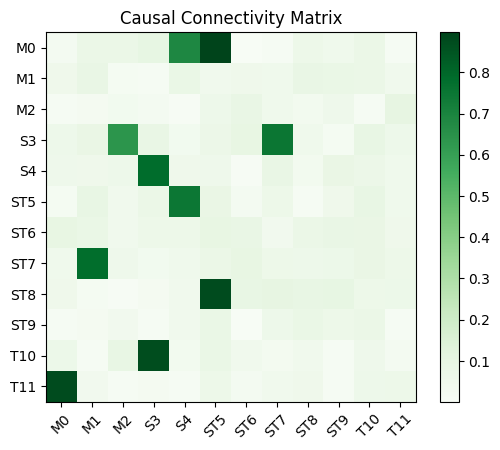

In [14]:
plot_CC(organoid)

Using the matrix above, try to stimulate one of the training neurons so that we get one motor neuron spiking more often than the other on the graph below. Take the connections we can derive from the graph to find a training neuron that would affect one specific motor neuron. For grading purposes also please embed a screenshot of your cc matrix and spike count chart in the markdown cell below, that way your answer is not invalidated by any randomness. 

In [ ]:
# valid syntax : organoid.sensory_stim_Hz[0] = 20
organoid.sensory_stim_Hz[ "your choice of neuron here" ] = "your choice of Hz here"

print(organoid.sensory_stim_Hz)

Once you've found a training neuron that maps to a motor neuron, stimulating it should cause that motor neuron to spike much more frequently than the others. This will be shown in the following graph. You should see one line that averages above the other two.

In [ ]:
plot_spike_count(organoid)

<b>Note :</b> This toy CC matrix is randomized, this allows you to test with multiple CC configurations, use the function below to try another configuration if you wish or if the current one is not optimal for the exercise. 

In [19]:
organoid = OrganoidInterface(env)

Embed the screenshot below:

<font color="green"><b> Answer

## <font color="green">Connection Diagram (5 points)

Recall the connection diagram from the Analysis section of this notebook. Draw out by hand (preferably via some digital illustration software) how you want your organoid's architecture to connect, how each neuron interacts and flows into the next. Embed that image below, if you do not know how to do this, simply upload the file to the images folder of this repository and use the previous figures in this notebook as an example on how to get them to show. Label each neuron and include a legend which explains what type of the three neurons it is and what specific function(s)  you want it to serve in the network. This diagram will then be used to choose the neurons being stimulated and read from when it comes to running the experiment. The diagram should show most of the train/sensory/training neurons but you will probably not need to plot out up to all 20 neural units if you get that many, just the ones essential for the experiment, the primary connections.

Embed your image in the following cell : <font color="green">(3 points)

<font color="green"><b>Answer

Write your legend for the neuron labels in the following cell : <font color="green"> (2 points)

<font color="green"><b>Answer

## <font color="green">Design an encoding Function (5 Points)

Put your code for your encoding function in the function below. This function should send signals to the organoid's sensory neurons to tell it the current state of the environment in Foodland.

<font color="green"><b>Answer

In [15]:
# Self is here because this is exactly how the method will be 
# overwritten and set in the actual class.
def set_sensory_signal(self, obs: np.ndarray):
    '''
    Maps the game observation to the sensory neurons. Called every timestep of the simulation
    to encode information into the organoid

    obs is of the form:
        ndarray with shape (9,): 
        0 - food_signal         1 when close to food, .001 when far, exponentially decaying
        1 - spike_signal,       1 when close to spike, .001 when far, exponentially decaying
        2 - agent_pos[0]        x position of agent
        3 - agent_pos[1],       y position of agent
        4 - agent_dir           direction of agent in radians
        5 - food_got            foods captured this step
        6 - spike_hit           spikes hit this step (we will not be playing with spikes/bombs)
        7 - is_contacting_wall  boolean, false normally, true if our mouse is on the edge of the game world, can be used to get unstuck
        8 - food_signal_grad    gradient of the mouse's movement

    Set the frequency to stimulate the sensory neurons
    Frequencies are capped at 30Hz.
    '''

    """
    Put your code for your encoding function here
    """

    if self.verbose:
        print(f'Stim:Hz: \t{self.sensory_stim_Hz}')

    return self.sensory_stim_Hz

# Test it out:
observation = env.reset()

sensory_signal = set_sensory_signal(organoid, observation)

## <font color="green">Design a Decoding Function (5 points)

Put your code for your decoding function in the function below. This function should read neural activity from our culture to actuate in Foodland.

<font color="green"><b>Answer

In [19]:
def get_motor_signal(self):
    '''
    Readout from the read/motor neurons. Called at the end of each timestep,
    Generates the action used to step the simulation forward.

    The action returned should be of the shape (2,)
    where:  
            action[0] is forward speed  within [0,1]
            action[1] is turn speed,    within [-1,1]

    inputs to use are:
    self.motor_spike_count, shape (2,)
        where each index is a 0 or 1 depending on the spike count from the
        corresponding motor neuron        
    
    Recommended to use self.spike_count, which is a list of the spike counts
    for each motor neuron 

    '''
   
    """
    Put your code for your decoding function here
    """

    forward_speed = 0 # change this to the output of your function 
    turn_speed = 0 # change this to the ouput of your function

    action = [forward_speed, turn_speed]

    return action

# Test it out:
observation = env.reset()

action = get_motor_signal(organoid)

## <font color="green"> Design a Training Function (10 points)

What specifically are you trying to test with your training stimulation patterns? State a hypothesis for how your training function will affect the organoid's ability to successfully play the game. Did you use any literature in creating this pattern, if so what? What justification is there to support your hypothesis? If your experiment goes according to plan what will be the outcome according to your hypothesis?

<font color="green"><b>Answer

Put your code for your training function in the function below. This function should send stimuli to the training neurons in the culture to affect change in their circuitry. Try to make this function pragmatic but still unique, you will be partly graded on your creativity here.

Feel free to draft your stim signals in the cell below! Leave this scratchwork there for the final submission. 

<font color="green"><b>Answer

In [20]:
def get_training_signal(self):
    '''
    The stimulation on the training neurons. Called at the end of each episode.
    We can use the previous rewards to decide the type of stimulus. Historically high-frequency
    stimulus is used for modifications of the network.

    A training pulse is not dynamic, but can be directly built using the stim-builder functions 
    or directly crafting the variables.

    self.rewards references the list of rewards from the episodes
        do NOT modify this list, if you want to, make a copy

    return: train_action, train_Hz

    '''
    

    
    train_action = [] # replace this with your own train ation derived by a function
    train_Hz = 0 # replace this with your own train Hz either static or determined by your function 

    return train_action, train_Hz

# Test it out:
train_action, train_Hz = get_training_signal(organoid)
print('Train action:', train_action) # We can use the stim_builder to visualize this
print('Train Hz:', train_Hz)

Train action: []
Train Hz: 0


# Testing Enviroment

This part of the notebook serves as a way for you to test the functions you wrote above and see their outputs from running in the toy environment, that way once we run the experiment on an actual organoid you will be sure that your code works as intended. 

The following code tests the sensory signal from encode :

In [ ]:
env = FoodLandEnv(render_mode=None, max_steps=500)
observation = env.reset()
sensory_array = []
observations = []
cur_reward = 0
rewards = []
step = 1

trial_complete = False

while not trial_complete:
    action = compute_smart_action(observation)


    observation, reward, done, info = env.step(action)
    observations.append(observation)
    cur_reward += reward

    # Set sensory signal, keep track of it so we can plot it
    sensory_signal = set_sensory_signal(organoid, observation)
    sensory_array.append(sensory_signal)


    env.render()

    if done :
        rewards.append(cur_reward)
        # print(f"Trial {trial_num}: Step {step} === Episode finished. Reward: {cur_reward}")
        # print("All rewards:", rewards)

        if step >= n_steps:
            trial_complete = True
            break
        cur_reward = 0
        env.reset()
        trial_num += 1

    step += 1

# Plot the sensory signal
sensory_array = np.array(sensory_array).T
observations = np.array(observations).T
fig, ax = plt.subplots(3, 1)
ax[0].plot(rewards)
ax[0].set_xlabel('Episode')
ax[0].set_ylabel('Reward')
ax[0].set_title('Reward per Episode')

#plot food signal and agent direction
ax[1].plot(observations[0], label='Food Signal')
ax[1].set_xlabel('Step')
ax[1].set_ylabel('Signal')

ax[2].plot(sensory_array[0], label='Stim neuron 1 Hz')
ax[2].plot(sensory_array[1], label='Stim neuron 2 Hz')
ax[2].plot(sensory_array[2], label='Stim neuron 3 Hz')
ax[2].set_xlabel('Step')
ax[2].set_ylabel('Signal')
ax[2].set_title('Sensory Signal')
ax[2].legend()

plt.show()

The following code tests motor spiking and decode :

In [ ]:
# Lets see what the action is based on fake motor spikes
motor_spike_arr = []
motor_spike_rate_arr = []

action_arr = []
for i in range(20):
    motor_spikes = organoid.get_fake_motor_spikes()
    organoid.motor_spike_count = motor_spikes
    action = get_motor_signal(organoid)
    # print('Motor spikes:', motor_spikes, 'Action:', action)
    motor_spike_arr.append(motor_spikes)
    motor_spike_rate_arr.append(organoid.motor_spike_rate)
    action_arr.append(action)

motor_spike_arr = np.array(motor_spike_arr).T
motor_spike_rate_arr = np.array(motor_spike_rate_arr).T

fig, ax = plt.subplots(2, 1)
# 3 colors for motor neurons
colors = ['r', 'g', 'b']
for i in range(3):
    ax[0].plot(motor_spike_arr[i], color=colors[i])
    ax[0].plot(motor_spike_rate_arr[i],color=colors[i], linestyle='--')
ax[0].set_xlabel('Step')
ax[0].set_ylabel('Spike Count')
ax[0].set_title('Motor Spike Count')

action_arr = np.array(action_arr).T
ax[1].plot(action_arr[0], label='Turn Speed')
ax[1].plot(action_arr[1], label='Forward Speed')
ax[1].set_xlabel('Step')
ax[1].set_ylabel('Action')
ax[1].set_title('Action')
ax[1].legend()

plt.show()


The following code tests the entire organoid with the three functions you've written :

In [43]:
file_name = 'test'
organoid = OrganoidInterface(env, verbose=False, test_file_name=file_name, n_episodes=10)
# Now we can test the whole thing
organoid.set_sensory_function(set_sensory_signal)
organoid.set_motor_function(get_motor_signal)
organoid.set_training_function(get_training_signal)

organoid.run()


The final few functions are how we record and play back the organoid's behavior in the game.

In [44]:
# Load the game and training logs

def open_log(file_name, type='game'):
    '''
    Open the log file and return a dataframe
    type: 'game' or 'train'
    '''
    log = pd.read_csv(file_name + f'_{type}_log.csv')
    return log

game_log = open_log(file_name, 'game')
train_log = open_log(file_name, 'train')

In [ ]:
game_plots(game_log)

In [ ]:
speed_plots(game_log)